In [2]:
"""Projeto para avalia diferentes modelos de previsão de série temporal."""

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import pandas as pd
from db import executa_query, consulta_valores

import warnings
warnings.filterwarnings("ignore")

In [3]:
query = consulta_valores('Atendimento Individual', 'Tipo Produção', 'SÃO PAULO')

df = executa_query(query)
df

,value,year,month
0,70,2016,3
1,680,2016,5
2,370,2016,7
3,1150,2016,8
4,5200,2016,9
...,...,...,...
94,1562847,2024,3
95,1770423,2024,4
96,1646394,2024,5
97,1544733,2024,6


In [4]:
# Filtrar os dados dos últimos 5 anos
df = df[df['year'] >= 2019]
df

,value,year,month
32,764138,2019,1
33,97016,2019,2
34,901086,2019,3
35,737748,2019,4
36,1062152,2019,5
...,...,...,...
94,1562847,2024,3
95,1770423,2024,4
96,1646394,2024,5
97,1544733,2024,6


In [5]:
# cria coluna ano-mes
df['ano-mes'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

In [ ]:
# Separar os dados em treino e teste
train = df['value'][:len(df)-12]
test = df['value'][len(df)-12:]


In [31]:
# Avaliar com Arima
model = ARIMA(train, order=(1,1,1))

model_fit = model.fit()

predictions = model_fit.forecast(steps=12)

print('ARIMA')
print('RMSE:', root_mean_squared_error(test, predictions))


ARIMA
RMSE: 170345.0233818424


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

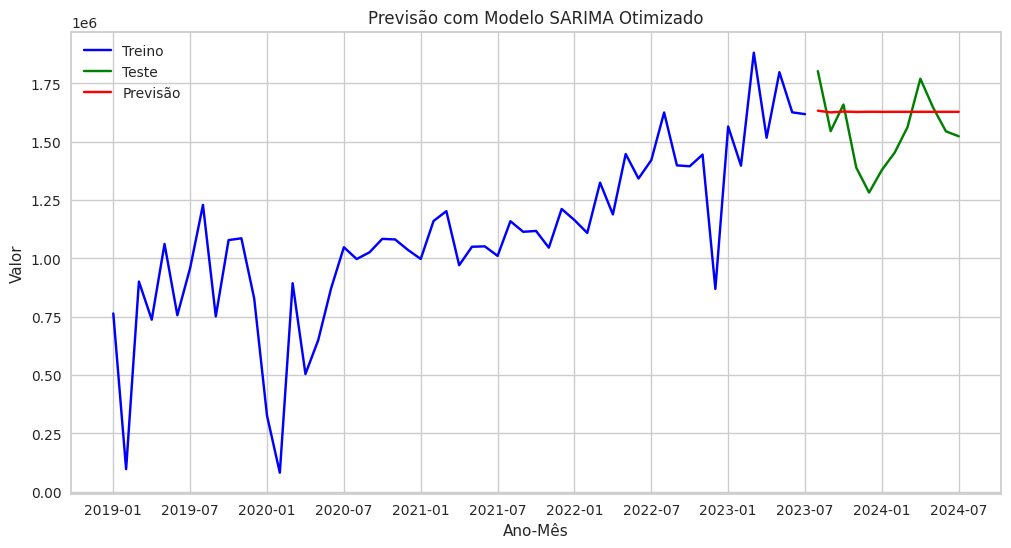

In [30]:
# Visualizar os dados
import matplotlib.pyplot as plt

# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], predictions, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA Otimizado')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [23]:

# Criar um modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Prever os valores
forecast = model_fit.forecast(steps=12)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

mse = mean_squared_error(test, forecast)
print(f'MSE: {mse}')

RMSE: 283655.4908282165
MSE: 80460437476.99641


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

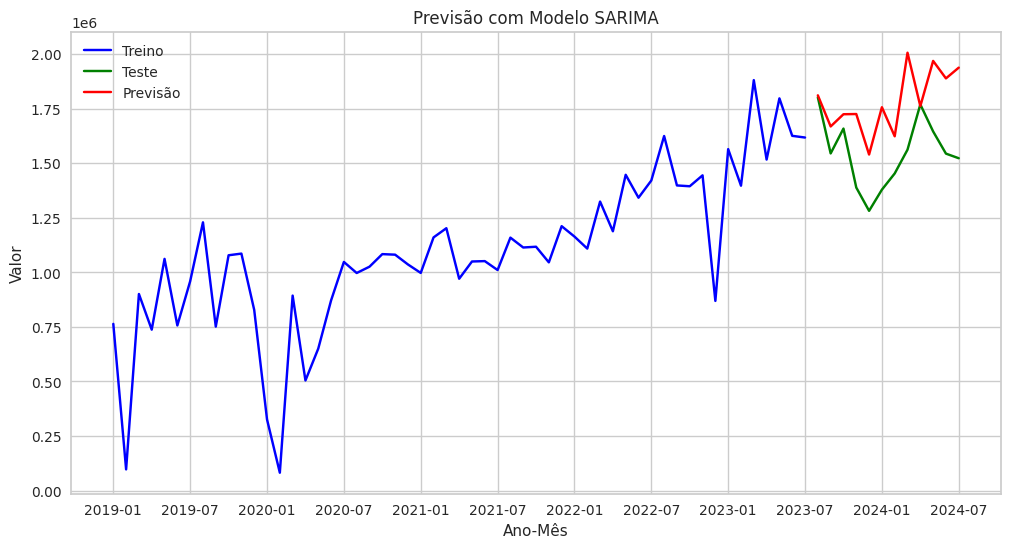

In [24]:
import matplotlib.pyplot as plt

# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(forecast, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [19]:
# Time Series Forecasting with random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Criar um modelo Random Forest
model = RandomForestRegressor()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# range de valores para prever
index = range(len(train), len(train)+12)

# Reshape para prever
index = pd.Series(index)
index = index.values.reshape(-1, 1)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 488790.011503234


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

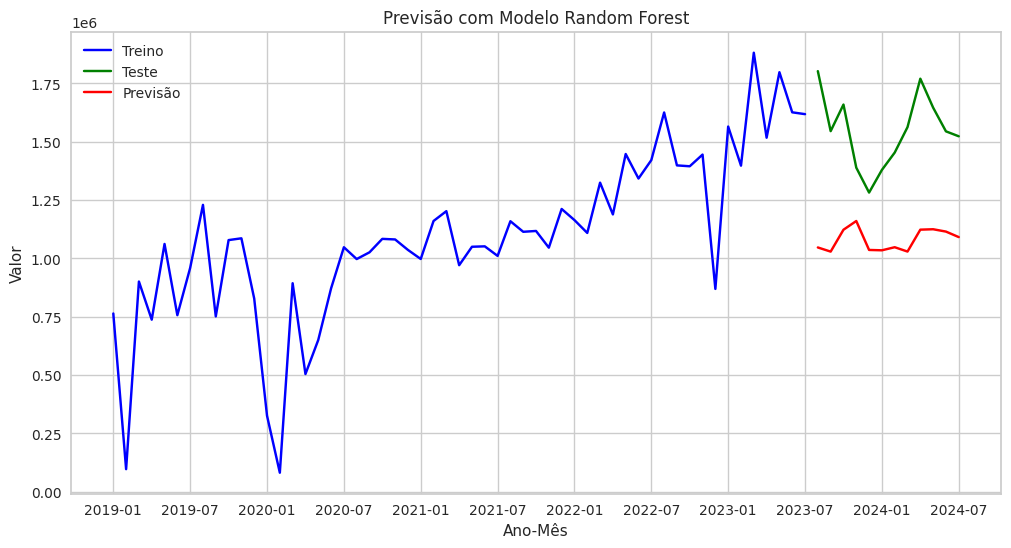

In [20]:
# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], forecast, label='Previsão', color='red')
plt.title('Previsão com Modelo Random Forest')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [18]:
# Time Series Forecasting with Linear Regression
from sklearn.linear_model import LinearRegression

# Criar um modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 458085.9330036302


In [22]:
# Time Series Forecasting with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Criar um modelo de Regressão Logística
model = LogisticRegression()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 492304.355581653


In [26]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK


# Função para treinar e avaliar o modelo SARIMA
def objective(params):
    # Extrair os parâmetros da busca
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), 12)  # Sazonalidade de 12 meses
    
    # Treinar o modelo SARIMA
    try:
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        
        # Fazer previsões no conjunto de teste
        predictions = results.predict(start=test.index[0], end=test.index[-1])
        
        # Calcular RMSE
        rmse = np.sqrt(mean_squared_error(test, predictions))
        
        # Retornar o RMSE como a métrica de avaliação
        return {'loss': rmse, 'status': STATUS_OK}
    
    except Exception as e:
        # Se algo falhar, retornar uma perda alta
        return {'loss': 100, 'status': STATUS_FAIL}

# Espaço de busca dos hiperparâmetros
space = {
    'p': hp.quniform('p', 0, 3, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1),
    'P': hp.quniform('P', 0, 3, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 3, 1)
}

# Função de otimização
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Melhor conjunto de hiperparâmetros
print("Best parameters:", best_params)

100%|██████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: 799564.3426511046]
Best parameters: {'D': 1.0, 'P': 1.0, 'Q': 2.0, 'd': 0.0, 'p': 2.0, 'q': 3.0}


In [27]:
# Avaliar o modelo com os melhores hiperparâmetros
order = (int(best_params['p']), int(best_params['d']), int(best_params['q']))
seasonal_order = (int(best_params['P']), int(best_params['D']), int(best_params['Q']), 12)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
predictions = results.predict(start=test.index[0], end=test.index[-1])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

RMSE: 799564.3426511046


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

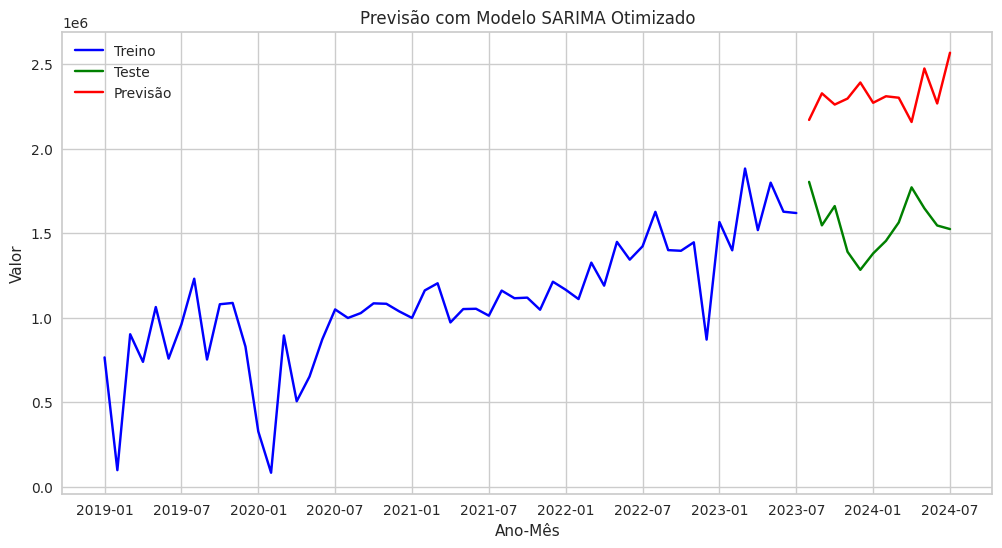

In [28]:
# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], predictions, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA Otimizado')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
# Testar com arima



In [3]:
import random

# Supondo que você tenha uma lista de municípios disponíveis
municipios = ['SÃO PAULO', 'RIO DE JANEIRO', 'BELO HORIZONTE', 'PORTO ALEGRE', 'CURITIBA', 
              'SALVADOR', 'FORTALEZA', 'BRASÍLIA', 'RECIFE', 'MANAUS', 'GOIÂNIA', 'BELÉM', 
              'VITÓRIA', 'NATAL', 'JOÃO PESSOA', 'CUIABÁ', 'CAMPO GRANDE', 'FLORIANÓPOLIS', 
              'MACAPÁ', 'RIO BRANCO', 'ARACAJU', 'PALMAS', 'TERESINA', 'SÃO LUÍS', 'MACEIÓ', 
              'PORTO VELHO', 'BOA VISTA', 'SANTOS', 'CAMPINAS', 'SOROCABA', 'SÃO JOSÉ DOS CAMPOS', 
              'RIBEIRÃO PRETO', 'JUNDIAÍ', 'SÃO BERNARDO DO CAMPO', 'SANTO ANDRÉ', 'OSASCO', 
              'GUARULHOS', 'BARUERI', 'SÃO CAETANO DO SUL', 'DIADEMA', 'MAUÁ', 'CARAPICUÍBA', 
              'TABOÃO DA SERRA', 'SÃO VICENTE', 'PRAIA GRANDE', 'CUBATÃO', 'GUARUJÁ', 'TAUBATÉ', 
              'LIMEIRA', 'PIRACICABA', 'BAURU', 'ARAÇATUBA', 'MARÍLIA', 'FRANCA', 'ARARAQUARA', 
              'SÃO CARLOS', 'JACAREÍ', 'INDAIATUBA', 'AMERICANA', 'HORTOLÂNDIA', 'SUMARÉ', 
              'PAULÍNIA', 'VALINHOS', 'VINHEDO', 'ITU', 'SALTO', 'ITUPEVA', 'JARINU', 'ATIBAIA', 
              'BRAGANÇA PAULISTA', 'MOGI DAS CRUZES', 'SUZANO', 'POÁ', 'ITAQUAQUECETUBA', 
              'FERRAZ DE VASCONCELOS', 'SÃO JOSÉ DO RIO PRETO', 'BARRETOS', 'CATANDUVA', 
              'VOTUPORANGA', 'JAÚ', 'OURINHOS', 'ASSIS', 'PRESIDENTE PRUDENTE', 'DRACENA', 
              'ADAMANTINA', 'ANDRADINA', 'BIRIGUI', 'PENÁPOLIS', 'LINS', 'BOTUCATU', 'AVARÉ', 
              'ITAPETININGA', 'TATUÍ', 'SOROCABA', 'ITU', 'SALTO', 'INDAIATUBA', 'CAMPINAS', 
              'JUNDIAÍ', 'SÃO PAULO']

# Selecionar 100 municípios aleatoriamente
municipios_selecionados = random.sample(municipios, 100)

# Gerar séries temporais para cada município selecionado
series_dict = {}
for municipio in municipios_selecionados:
    query = consulta_valores('Atendimento Individual', 'Tipo Produção', municipio)
    df = executa_query(query)
    series_dict[municipio] = df

# Exibir os municípios selecionados
print("Municípios selecionados:", municipios_selecionados)

Municípios selecionados: ['SALTO', 'SÃO CAETANO DO SUL', 'BOTUCATU', 'TAUBATÉ', 'OURINHOS', 'AVARÉ', 'BIRIGUI', 'SÃO PAULO', 'SOROCABA', 'PAULÍNIA', 'GOIÂNIA', 'ADAMANTINA', 'CURITIBA', 'MOGI DAS CRUZES', 'BOA VISTA', 'NATAL', 'PIRACICABA', 'PALMAS', 'JOÃO PESSOA', 'ITAQUAQUECETUBA', 'CAMPINAS', 'PRESIDENTE PRUDENTE', 'GUARULHOS', 'SÃO LUÍS', 'RECIFE', 'CUBATÃO', 'BELO HORIZONTE', 'BARRETOS', 'ITU', 'MACAPÁ', 'RIO BRANCO', 'DIADEMA', 'FRANCA', 'JARINU', 'FERRAZ DE VASCONCELOS', 'AMERICANA', 'FORTALEZA', 'HORTOLÂNDIA', 'LINS', 'VALINHOS', 'SÃO CARLOS', 'BRASÍLIA', 'SÃO JOSÉ DO RIO PRETO', 'VINHEDO', 'BELÉM', 'JACAREÍ', 'TATUÍ', 'DRACENA', 'SOROCABA', 'ASSIS', 'SUZANO', 'RIO DE JANEIRO', 'SANTO ANDRÉ', 'SALVADOR', 'LIMEIRA', 'PORTO VELHO', 'SUMARÉ', 'ITUPEVA', 'TERESINA', 'CAMPINAS', 'TABOÃO DA SERRA', 'BAURU', 'VOTUPORANGA', 'ARARAQUARA', 'MARÍLIA', 'RIBEIRÃO PRETO', 'ITU', 'ITAPETININGA', 'SÃO PAULO', 'PORTO ALEGRE', 'PENÁPOLIS', 'INDAIATUBA', 'CAMPO GRANDE', 'BRAGANÇA PAULISTA', 'ARAC

In [10]:
import time
from sklearn.metrics import mean_squared_error
import numpy as np

# Supondo que temos um dicionário de séries temporais
# series_dict = {
#    'serie1': df1,
#    'serie2': df2,
#    # Adicione mais séries conforme necessário
#}

# Função para treinar e avaliar modelos locais
def evaluate_local_models(series_dict):
    local_results = {}
    for name, series in series_dict.items():
        # Dividir a série em treino e teste
        train = series['value'][:len(series)-12]
        test = series['value'][len(series)-12:]
        
        # Treinar o modelo ARIMA
        start_time = time.time()
        model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
        model_fit = model.fit()
        train_time = time.time() - start_time
        
        # Fazer previsões
        start_time = time.time()
        predictions = model_fit.forecast(steps=12)
        response_time = time.time() - start_time
        
        # Calcular o erro
        rmse = np.sqrt(mean_squared_error(test, predictions))
        
        # Armazenar os resultados
        local_results[name] = {
            'train_time': train_time,
            'response_time': response_time,
            'rmse': rmse
        }
    return local_results

# Função para treinar e avaliar um modelo global
def evaluate_global_model(series_dict):
    # Concatenar todas as séries temporais
    global_series = pd.concat(series_dict.values())
    
    # Dividir a série global em treino e teste
    train = global_series['value'][:len(global_series)-12]
    test = global_series['value'][len(global_series)-12:]
    
    # Treinar o modelo ARIMA
    start_time = time.time()
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
    model_fit = model.fit()
    train_time = time.time() - start_time
    
    # Fazer previsões
    start_time = time.time()
    predictions = model_fit.forecast(steps=12)
    response_time = time.time() - start_time
    
    # Calcular o erro
    rmse = np.sqrt(mean_squared_error(test, predictions))
    
    # Armazenar os resultados
    global_results = {
        'train_time': train_time,
        'response_time': response_time,
        'rmse': rmse
    }
    return global_results

# Avaliar os modelos locais
local_results = evaluate_local_models(series_dict)

# Avaliar o modelo global
global_results = evaluate_global_model(series_dict)

# Comparar os resultados
print("Resultados dos Modelos Locais:")
for name, result in local_results.items():
    print(f"{name}: RMSE={result['rmse']}, Tempo de Treinamento={result['train_time']}, Tempo de Resposta={result['response_time']}")

print("\nResultados do Modelo Global:")
print(f"RMSE={global_results['rmse']}, Tempo de Treinamento={global_results['train_time']}, Tempo de Resposta={global_results['response_time']}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16480D+00    |proj g|=  4.75052D-02

At iterate    5    f=  8.13408D+00    |proj g|=  2.37775D-03


 This problem is unconstrained.



At iterate   10    f=  8.13393D+00    |proj g|=  1.18951D-04

At iterate   15    f=  8.13393D+00    |proj g|=  1.08042D-03

At iterate   20    f=  8.13356D+00    |proj g|=  9.04348D-03

At iterate   25    f=  8.10189D+00    |proj g|=  5.75772D-02

At iterate   30    f=  8.07114D+00    |proj g|=  2.03219D-03

At iterate   35    f=  8.07010D+00    |proj g|=  1.08180D-03

At iterate   40    f=  8.06985D+00    |proj g|=  5.78043D-04

At iterate   45    f=  8.06982D+00    |proj g|=  2.85105D-04

At iterate   50    f=  8.06981D+00    |proj g|=  4.07455D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     54   

 This problem is unconstrained.



At iterate   15    f=  8.61038D+00    |proj g|=  9.71053D-04

At iterate   20    f=  8.60879D+00    |proj g|=  1.28833D-02

At iterate   25    f=  8.56315D+00    |proj g|=  1.21736D-01

At iterate   30    f=  8.52079D+00    |proj g|=  7.06604D-04

At iterate   35    f=  8.52076D+00    |proj g|=  6.29134D-04

At iterate   40    f=  8.51021D+00    |proj g|=  6.67695D-02

At iterate   45    f=  8.49999D+00    |proj g|=  9.73098D-04

At iterate   50    f=  8.49954D+00    |proj g|=  4.81280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72      1     0     0   4.813D-03   8.500D+00
  F =   8.49954430193

 This problem is unconstrained.



At iterate   10    f=  8.75801D+00    |proj g|=  1.45521D-03

At iterate   15    f=  8.75798D+00    |proj g|=  9.76302D-05

At iterate   20    f=  8.75795D+00    |proj g|=  3.01075D-03

At iterate   25    f=  8.75434D+00    |proj g|=  4.02020D-02

At iterate   30    f=  8.69920D+00    |proj g|=  3.84279D-02

At iterate   35    f=  8.68965D+00    |proj g|=  7.52058D-03

At iterate   40    f=  8.68758D+00    |proj g|=  2.11857D-03

At iterate   45    f=  8.68738D+00    |proj g|=  3.57397D-03

At iterate   50    f=  8.68733D+00    |proj g|=  1.08289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate    5    f=  8.86602D+00    |proj g|=  8.25232D-03

At iterate   10    f=  8.86414D+00    |proj g|=  4.65732D-05

At iterate   15    f=  8.86413D+00    |proj g|=  4.97757D-04

At iterate   20    f=  8.86096D+00    |proj g|=  7.10269D-03

At iterate   25    f=  8.81490D+00    |proj g|=  1.45048D-02

At iterate   30    f=  8.75857D+00    |proj g|=  1.42309D-02

At iterate   35    f=  8.75732D+00    |proj g|=  9.01231D-05

At iterate   40    f=  8.75729D+00    |proj g|=  1.34239D-03

At iterate   45    f=  8.74939D+00    |proj g|=  6.05632D-03

At iterate   50    f=  8.74930D+00    |proj g|=  1.52758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.39050D+00    |proj g|=  5.46177D-03

At iterate   10    f=  8.38965D+00    |proj g|=  1.49019D-03

At iterate   15    f=  8.38963D+00    |proj g|=  3.36790D-04

At iterate   20    f=  8.38932D+00    |proj g|=  7.54572D-03

At iterate   25    f=  8.36558D+00    |proj g|=  2.28296D-02

At iterate   30    f=  8.34515D+00    |proj g|=  2.35390D-02

At iterate   35    f=  8.32189D+00    |proj g|=  1.35562D-02

At iterate   40    f=  8.32084D+00    |proj g|=  3.00406D-02

At iterate   45    f=  8.31972D+00    |proj g|=  1.07714D-03

At iterate   50    f=  8.31933D+00    |proj g|=  2.14072D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.71849D+00    |proj g|=  8.10403D-03

At iterate   15    f=  7.71672D+00    |proj g|=  1.56411D-03

At iterate   20    f=  7.71671D+00    |proj g|=  1.87522D-03

At iterate   25    f=  7.71590D+00    |proj g|=  2.86926D-02

At iterate   30    f=  7.67430D+00    |proj g|=  1.35354D-01

At iterate   35    f=  7.65633D+00    |proj g|=  1.31430D-02

At iterate   40    f=  7.65511D+00    |proj g|=  1.53705D-03

At iterate   45    f=  7.65492D+00    |proj g|=  8.16280D-04

At iterate   50    f=  7.65491D+00    |proj g|=  1.71772D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56   

 This problem is unconstrained.



At iterate    5    f=  8.93078D+00    |proj g|=  2.81060D-03

At iterate   10    f=  8.93060D+00    |proj g|=  6.61741D-05

At iterate   15    f=  8.93059D+00    |proj g|=  1.48013D-03

At iterate   20    f=  8.92926D+00    |proj g|=  1.74063D-02

At iterate   25    f=  8.83970D+00    |proj g|=  7.59178D-02

At iterate   30    f=  8.83157D+00    |proj g|=  7.64930D-03
  ys=-2.135E-03  -gs= 3.935E-03 BFGS update SKIPPED

At iterate   35    f=  8.79012D+00    |proj g|=  1.50502D-02

At iterate   40    f=  8.78989D+00    |proj g|=  6.30909D-04

At iterate   45    f=  8.78973D+00    |proj g|=  5.71814D-03

At iterate   50    f=  8.78956D+00    |proj g|=  1.69746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  1.23933D+01    |proj g|=  2.51520D-02

At iterate   10    f=  1.23812D+01    |proj g|=  1.69306D-03

At iterate   15    f=  1.23812D+01    |proj g|=  8.23466D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   8.235D-06   1.238D+01
  F =   12.381175985633014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.13409D+00    |proj g|=  1.34479D-01


 This problem is unconstrained.



At iterate    5    f=  9.05660D+00    |proj g|=  2.17250D-02

At iterate   10    f=  9.05475D+00    |proj g|=  3.34282D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   2.696D-05   9.055D+00
  F =   9.0547450295642307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29831D+00    |proj g|=  5.44979D-01

At iterate    5    f=  7.05784D+00    |proj g|=  5.57874D-03


 This problem is unconstrained.



At iterate   10    f=  7.05703D+00    |proj g|=  1.58206D-04

At iterate   15    f=  7.05700D+00    |proj g|=  3.60470D-03

At iterate   20    f=  7.05300D+00    |proj g|=  4.52768D-02

At iterate   25    f=  6.96125D+00    |proj g|=  9.48910D-02

At iterate   30    f=  6.94300D+00    |proj g|=  3.95498D-03

At iterate   35    f=  6.94123D+00    |proj g|=  4.78258D-04

At iterate   40    f=  6.94108D+00    |proj g|=  2.41217D-04

At iterate   45    f=  6.94107D+00    |proj g|=  3.24698D-04

At iterate   50    f=  6.94106D+00    |proj g|=  1.99304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   1.261D-05   9.654D+00
  F =   9.6538327565841087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07945D+00    |proj g|=  6.04601D-02

At iterate    5    f=  9.05435D+00    |proj g|=  3.17253D-03


 This problem is unconstrained.



At iterate   10    f=  9.05415D+00    |proj g|=  6.10973D-05

At iterate   15    f=  9.05413D+00    |proj g|=  2.63800D-03

At iterate   20    f=  9.05170D+00    |proj g|=  3.25143D-02

At iterate   25    f=  8.99250D+00    |proj g|=  1.33246D-01

At iterate   30    f=  8.96977D+00    |proj g|=  6.90002D-03

At iterate   35    f=  8.96707D+00    |proj g|=  7.61358D-04

At iterate   40    f=  8.96688D+00    |proj g|=  2.81964D-03

At iterate   45    f=  8.96683D+00    |proj g|=  3.61078D-04

At iterate   50    f=  8.96683D+00    |proj g|=  7.11053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55   

 This problem is unconstrained.



At iterate   10    f=  1.09387D+01    |proj g|=  3.53324D-02

At iterate   15    f=  1.09326D+01    |proj g|=  1.17273D-03

At iterate   20    f=  1.09205D+01    |proj g|=  3.56378D-02

At iterate   25    f=  1.09108D+01    |proj g|=  2.02576D-02

At iterate   30    f=  1.09100D+01    |proj g|=  4.34426D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     53      1     0     0   4.344D-06   1.091D+01
  F =   10.910038708551220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.78480D+00    |proj g|=  4.80011D-03

At iterate   10    f=  9.78412D+00    |proj g|=  3.73552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   3.736D-05   9.784D+00
  F =   9.7841240452856244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.21138D+00    |proj g|=  9.38964D-02

At iterate    5    f=  9.17329D+00    |proj g|=  1.86029D-03


 This problem is unconstrained.



At iterate   10    f=  9.17327D+00    |proj g|=  1.66403D-04

At iterate   15    f=  9.17322D+00    |proj g|=  1.37559D-03

At iterate   20    f=  9.16691D+00    |proj g|=  9.69185D-03

At iterate   25    f=  9.08259D+00    |proj g|=  3.97058D-02

At iterate   30    f=  9.07835D+00    |proj g|=  2.49340D-03

At iterate   35    f=  9.07708D+00    |proj g|=  2.34682D-03

At iterate   40    f=  9.07679D+00    |proj g|=  5.44001D-04

At iterate   45    f=  9.07678D+00    |proj g|=  7.50164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     53      1     0     0   6.661D-05   9.077D+00
  F =   9.07677475221

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02812D+01    |proj g|=  2.40052D-01

At iterate    5    f=  1.01970D+01    |proj g|=  1.25631D-02


 This problem is unconstrained.



At iterate   10    f=  1.01961D+01    |proj g|=  1.29091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   2.416D-05   1.020D+01
  F =   10.196091264725055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55505D+00    |proj g|=  3.54555D-02

At iterate    5    f=  9.54573D+00    |proj g|=  2.02665D-03


 This problem is unconstrained.



At iterate   10    f=  9.54565D+00    |proj g|=  2.80661D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   2.807D-05   9.546D+00
  F =   9.5456518517295468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61519D+00    |proj g|=  3.12824D-01

At iterate    5    f=  7.52177D+00    |proj g|=  3.15010D-02


 This problem is unconstrained.



At iterate   10    f=  7.51719D+00    |proj g|=  1.17383D-03

At iterate   15    f=  7.51480D+00    |proj g|=  2.84239D-02

At iterate   20    f=  7.50565D+00    |proj g|=  5.85044D-03

At iterate   25    f=  7.50537D+00    |proj g|=  1.60374D-04

At iterate   30    f=  7.50527D+00    |proj g|=  4.33452D-03

At iterate   35    f=  7.49829D+00    |proj g|=  9.65364D-02

At iterate   40    f=  7.47288D+00    |proj g|=  3.69200D-02

At iterate   45    f=  7.47135D+00    |proj g|=  2.70333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     62      1     0     0   1.205D-05   7.471D+00
  F =   7.47134465222

 This problem is unconstrained.



At iterate    5    f=  9.93090D+00    |proj g|=  5.40319D-03

At iterate   10    f=  9.93011D+00    |proj g|=  1.93475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   1.935D-05   9.930D+00
  F =   9.9301099251278906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30067D+00    |proj g|=  9.05382D-02


 This problem is unconstrained.



At iterate    5    f=  9.26786D+00    |proj g|=  1.86371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   4.472D-05   9.268D+00
  F =   9.2678365171821593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02251D+01    |proj g|=  1.15679D-01


 This problem is unconstrained.



At iterate    5    f=  1.01723D+01    |proj g|=  2.50598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     10      1     0     0   1.300D-05   1.017D+01
  F =   10.172290339363176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70041D+00    |proj g|=  7.44201D-02

At iterate    5    f=  9.66611D+00    |proj g|=  2.67842D-03

At iterate   10    f=  9.66602D+00    |proj g|=  3.03794D-05

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83701D+00    |proj g|=  6.22251D-02

At iterate    5    f=  9.80279D+00    |proj g|=  9.36827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   2.095D-05   9.803D+00
  F =   9.8027809586393797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   15    f=  8.01298D+00    |proj g|=  1.51695D-03

At iterate   20    f=  8.01118D+00    |proj g|=  2.41684D-02

At iterate   25    f=  7.97344D+00    |proj g|=  5.56315D-02

At iterate   30    f=  7.94335D+00    |proj g|=  1.98333D-02

At iterate   35    f=  7.94194D+00    |proj g|=  3.98060D-03

At iterate   40    f=  7.94117D+00    |proj g|=  1.70942D-03

At iterate   45    f=  7.94102D+00    |proj g|=  5.53812D-04

At iterate   50    f=  7.94101D+00    |proj g|=  1.11916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   1.119D-04   7.941D+00
  F =   7.94100712434

 This problem is unconstrained.



At iterate   10    f=  1.12965D+01    |proj g|=  4.55697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   7.857D-06   1.130D+01
  F =   11.296276911158857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92979D+00    |proj g|=  6.38813D-02

At iterate    5    f=  8.90054D+00    |proj g|=  6.36101D-04


 This problem is unconstrained.



At iterate   10    f=  8.90053D+00    |proj g|=  1.26625D-04

At iterate   15    f=  8.90052D+00    |proj g|=  1.43554D-03

At iterate   20    f=  8.89852D+00    |proj g|=  1.96213D-02

At iterate   25    f=  8.82923D+00    |proj g|=  7.61027D-02

At iterate   30    f=  8.81164D+00    |proj g|=  2.14924D-03

At iterate   35    f=  8.81153D+00    |proj g|=  1.18773D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     40      1     0     0   1.590D-05   8.812D+00
  F =   8.8115313295966704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31614D+00    |proj g|=  7.10184D-02

At iterate    5    f=  8.27525D+00    |proj g|=  3.38128D-03

At iterate   10    f=  8.27514D+00    |proj g|=  6.03583D-05

At iterate   15    f=  8.27514D+00    |proj g|=  8.79485D-04

At iterate   20    f=  8.27484D+00    |proj g|=  1.07815D-02

At iterate   25    f=  8.25140D+00    |proj g|=  8.58069D-02

At iterate   30    f=  8.21966D+00    |proj g|=  7.18922D-03

At iterate   35    f=  8.21717D+00    |proj g|=  9.44224D-04

At iterate   40    f=  8.21673D+00    |proj g|=  1.09410D-03

At iterate   45    f=  8.21667D+00    |proj g|=  3.96998D-04

At iterate   50    f=  8.21667D+00    |proj g|=  5.87765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  8.50925D+00    |proj g|=  1.09563D-02

At iterate   20    f=  8.49232D+00    |proj g|=  9.21184D-02

At iterate   25    f=  8.42573D+00    |proj g|=  1.40156D-02

At iterate   30    f=  8.42512D+00    |proj g|=  2.43194D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   7.611D-06   8.425D+00
  F =   8.4251198371722147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.56287D+00    |proj g|=  3.43739D-02

At iterate   10    f=  9.55469D+00    |proj g|=  1.59712D-03

At iterate   15    f=  9.55460D+00    |proj g|=  4.82501D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   4.825D-05   9.555D+00
  F =   9.5546005315949873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.79250D+00    |proj g|=  1.23926D-01


 This problem is unconstrained.



At iterate    5    f=  9.72949D+00    |proj g|=  1.44327D-03

At iterate   10    f=  9.72946D+00    |proj g|=  1.09767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   2.353D-05   9.729D+00
  F =   9.7294571731528077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31981D+00    |proj g|=  9.36169D-02


 This problem is unconstrained.



At iterate    5    f=  8.29313D+00    |proj g|=  1.30172D-02

At iterate   10    f=  8.29278D+00    |proj g|=  1.80206D-04

At iterate   15    f=  8.29278D+00    |proj g|=  5.09490D-04

At iterate   20    f=  8.29265D+00    |proj g|=  2.71528D-03

At iterate   25    f=  8.27773D+00    |proj g|=  7.73526D-02

At iterate   30    f=  8.23815D+00    |proj g|=  4.20272D-02

At iterate   35    f=  8.23427D+00    |proj g|=  1.92739D-03

At iterate   40    f=  8.23396D+00    |proj g|=  5.45966D-03

At iterate   45    f=  8.23391D+00    |proj g|=  1.10601D-03

At iterate   50    f=  8.23390D+00    |proj g|=  2.14186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.95200D+00    |proj g|=  1.81229D-04

At iterate   15    f=  7.95197D+00    |proj g|=  1.73957D-03

At iterate   20    f=  7.94855D+00    |proj g|=  3.72437D-02

At iterate   25    f=  7.87473D+00    |proj g|=  7.13476D-02

At iterate   30    f=  7.86003D+00    |proj g|=  2.36657D-02

At iterate   35    f=  7.85526D+00    |proj g|=  1.15049D-03

At iterate   40    f=  7.85525D+00    |proj g|=  1.34013D-03

At iterate   45    f=  7.85011D+00    |proj g|=  4.65573D-02

At iterate   50    f=  7.84496D+00    |proj g|=  1.36857D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71   

 This problem is unconstrained.



At iterate    5    f=  7.97662D+00    |proj g|=  1.85698D-03

At iterate   10    f=  7.97657D+00    |proj g|=  3.18474D-03
  ys=-7.953E-03  -gs= 1.282E-03 BFGS update SKIPPED

At iterate   15    f=  7.95660D+00    |proj g|=  3.59599D-02

At iterate   20    f=  7.94265D+00    |proj g|=  1.03511D-03

At iterate   25    f=  7.94264D+00    |proj g|=  4.79140D-04

At iterate   30    f=  7.94253D+00    |proj g|=  7.34526D-03

At iterate   35    f=  7.92882D+00    |proj g|=  4.93620D-02

At iterate   40    f=  7.87938D+00    |proj g|=  3.51621D-02

At iterate   45    f=  7.87816D+00    |proj g|=  2.53067D-04

At iterate   50    f=  7.87751D+00    |proj g|=  2.43873D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  7.75896D+00    |proj g|=  5.29494D-03

At iterate   15    f=  7.75136D+00    |proj g|=  5.79513D-02

At iterate   20    f=  7.70143D+00    |proj g|=  1.02336D-02

At iterate   25    f=  7.69776D+00    |proj g|=  3.06288D-03

At iterate   30    f=  7.69715D+00    |proj g|=  5.83334D-04

At iterate   35    f=  7.69706D+00    |proj g|=  2.36751D-03

At iterate   40    f=  7.69705D+00    |proj g|=  6.69649D-04

At iterate   45    f=  7.69704D+00    |proj g|=  1.58875D-04

At iterate   50    f=  7.69704D+00    |proj g|=  1.19887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85155D+00    |proj g|=  6.92722D-02

At iterate    5    f=  8.81891D+00    |proj g|=  1.48348D-02

At iterate   10    f=  8.81854D+00    |proj g|=  2.41405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   3.990D-05   8.819D+00
  F =   8.8185363519183753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  8.66203D+00    |proj g|=  1.04693D-02

At iterate   10    f=  8.65433D+00    |proj g|=  1.58243D-02

At iterate   15    f=  8.65149D+00    |proj g|=  1.49329D-03

At iterate   20    f=  8.65145D+00    |proj g|=  6.49035D-05

At iterate   25    f=  8.65097D+00    |proj g|=  7.41478D-03

At iterate   30    f=  8.62001D+00    |proj g|=  9.03757D-02

At iterate   35    f=  8.58906D+00    |proj g|=  4.20739D-02

At iterate   40    f=  8.57292D+00    |proj g|=  1.29448D-02

At iterate   45    f=  8.57173D+00    |proj g|=  8.80367D-04

At iterate   50    f=  8.57161D+00    |proj g|=  2.25070D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  5.14073D+00    |proj g|=  1.71007D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   8.945D-06   5.139D+00
  F =   5.1385814976844806     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47019D+00    |proj g|=  5.76735D-01

At iterate    5    f=  9.18616D+00    |proj g|=  3.28127D-03


 This problem is unconstrained.



At iterate   10    f=  9.18544D+00    |proj g|=  8.98526D-05

At iterate   15    f=  9.18543D+00    |proj g|=  6.50934D-04

At iterate   20    f=  9.18421D+00    |proj g|=  8.24341D-03

At iterate   25    f=  9.12881D+00    |proj g|=  6.60760D-02

At iterate   30    f=  9.09325D+00    |proj g|=  1.15433D-02

At iterate   35    f=  9.09230D+00    |proj g|=  8.75502D-05

At iterate   40    f=  9.09228D+00    |proj g|=  1.28750D-03

At iterate   45    f=  9.08382D+00    |proj g|=  6.64315D-03

At iterate   50    f=  9.08247D+00    |proj g|=  4.32506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64   

 This problem is unconstrained.



At iterate    5    f=  1.07862D+01    |proj g|=  3.12148D-03

At iterate   10    f=  1.07859D+01    |proj g|=  5.46230D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   5.462D-06   1.079D+01
  F =   10.785868572528205     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92553D+00    |proj g|=  3.93794D-02

At iterate    5    f=  9.91538D+00    |proj g|=  4.31321D-02


 This problem is unconstrained.



At iterate   10    f=  9.91042D+00    |proj g|=  1.35742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.840D-05   9.910D+00
  F =   9.9104017922555521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28055D+00    |proj g|=  9.89414D-02

At iterate    5    f=  7.24601D+00    |proj g|=  1.73830D-02


 This problem is unconstrained.



At iterate   10    f=  7.24464D+00    |proj g|=  6.86901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   6.694D-05   7.245D+00
  F =   7.2446423960354984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01879D+01    |proj g|=  8.62580D-02


 This problem is unconstrained.



At iterate    5    f=  1.01659D+01    |proj g|=  8.05897D-03

At iterate   10    f=  1.01656D+01    |proj g|=  4.67689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.322D-05   1.017D+01
  F =   10.165573294634690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61028D+00    |proj g|=  9.89751D-02

At iterate    5    f=  9.58413D+00    |proj g|=  8.22020D-03


 This problem is unconstrained.



At iterate   10    f=  9.57915D+00    |proj g|=  3.14728D-03

At iterate   15    f=  9.57911D+00    |proj g|=  2.59986D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   2.600D-05   9.579D+00
  F =   9.5791074065730442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49588D+00    |proj g|=  2.67033D-01

At iterate    5    f=  7.34140D+00    |proj g|=  1.57203D-02


 This problem is unconstrained.



At iterate   10    f=  7.30280D+00    |proj g|=  4.81752D-02

At iterate   15    f=  7.29123D+00    |proj g|=  1.72810D-02

At iterate   20    f=  7.29048D+00    |proj g|=  1.25829D-04

At iterate   25    f=  7.29046D+00    |proj g|=  2.66190D-03

At iterate   30    f=  7.28827D+00    |proj g|=  2.32785D-02

At iterate   35    f=  7.25661D+00    |proj g|=  5.64434D-02

At iterate   40    f=  7.24843D+00    |proj g|=  4.58662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     56      1     0     0   2.981D-06   7.248D+00
  F =   7.2483906678809538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17987D+00    |proj g|=  1.31628D-01

At iterate    5    f=  8.09063D+00    |proj g|=  5.93619D-02

At iterate   10    f=  8.08073D+00    |proj g|=  4.20252D-03

At iterate   15    f=  8.07977D+00    |proj g|=  9.15016D-05

At iterate   20    f=  8.07973D+00    |proj g|=  2.85201D-03

At iterate   25    f=  8.07517D+00    |proj g|=  3.88662D-02

At iterate   30    f=  8.03606D+00    |proj g|=  5.19953D-02

At iterate   35    f=  8.03245D+00    |proj g|=  1.50181D-02

At iterate   40    f=  8.03186D+00    |proj g|=  1.53641D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  8.06269D+00    |proj g|=  4.28594D-03

At iterate   10    f=  8.06092D+00    |proj g|=  2.31246D-03

At iterate   15    f=  8.06089D+00    |proj g|=  9.23501D-05

At iterate   20    f=  8.06089D+00    |proj g|=  8.75936D-04

At iterate   25    f=  8.06029D+00    |proj g|=  9.35502D-03

At iterate   30    f=  8.05048D+00    |proj g|=  1.91084D-02

At iterate   35    f=  8.03767D+00    |proj g|=  2.81911D-04

At iterate   40    f=  8.03766D+00    |proj g|=  1.21380D-03

At iterate   45    f=  8.03526D+00    |proj g|=  5.03153D-03

At iterate   50    f=  8.03518D+00    |proj g|=  1.89804D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.56647D+00    |proj g|=  1.80487D-04

At iterate   15    f=  8.56642D+00    |proj g|=  3.35323D-03

At iterate   20    f=  8.55860D+00    |proj g|=  4.87192D-02

At iterate   25    f=  8.45662D+00    |proj g|=  3.19885D-02

At iterate   30    f=  8.45330D+00    |proj g|=  3.82069D-03

At iterate   35    f=  8.45323D+00    |proj g|=  9.19087D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     38      1     0     0   9.191D-07   8.453D+00
  F =   8.4532330676106131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.19520D+01    |proj g|=  1.00440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   6.682D-06   1.195D+01
  F =   11.951974064784546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25448D+00    |proj g|=  7.66912D-02

At iterate    5    f=  9.22102D+00    |proj g|=  1.29074D-02


 This problem is unconstrained.



At iterate   10    f=  9.21335D+00    |proj g|=  2.00456D-03

At iterate   15    f=  9.21313D+00    |proj g|=  7.92332D-05

At iterate   20    f=  9.21306D+00    |proj g|=  7.00125D-03

At iterate   25    f=  9.20916D+00    |proj g|=  3.81948D-02

At iterate   30    f=  9.15682D+00    |proj g|=  4.20210D-02

At iterate   35    f=  9.15421D+00    |proj g|=  9.67448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     39      1     0     0   1.768D-05   9.154D+00
  F =   9.1542083642893743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.01282D+01    |proj g|=  4.10894D-03

At iterate   15    f=  1.01260D+01    |proj g|=  5.82372D-03

At iterate   20    f=  1.01259D+01    |proj g|=  2.99795D-04

At iterate   25    f=  1.01258D+01    |proj g|=  2.46276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   1.452D-05   1.013D+01
  F =   10.125846658268493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.25784D+00    |proj g|=  1.06367D-02

At iterate   10    f=  8.25699D+00    |proj g|=  9.08125D-05

At iterate   15    f=  8.25699D+00    |proj g|=  5.46896D-04

At iterate   20    f=  8.25649D+00    |proj g|=  9.60015D-03

At iterate   25    f=  8.23823D+00    |proj g|=  5.02300D-02

At iterate   30    f=  8.22309D+00    |proj g|=  5.30529D-03

At iterate   35    f=  8.22295D+00    |proj g|=  6.95303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     38      1     0     0   6.953D-05   8.223D+00
  F =   8.2229506588130370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26098D+00    |proj g|=  6.52519D-02

At iterate    5    f=  8.23197D+00    |proj g|=  7.69811D-03

At iterate   10    f=  8.23186D+00    |proj g|=  1.17729D-04

At iterate   15    f=  8.23182D+00    |proj g|=  2.83581D-03

At iterate   20    f=  8.22612D+00    |proj g|=  6.80748D-02

At iterate   25    f=  8.15346D+00    |proj g|=  1.59499D-02

At iterate   30    f=  8.14993D+00    |proj g|=  8.73039D-03

At iterate   35    f=  8.14942D+00    |proj g|=  2.41764D-03

At iterate   40    f=  8.14937D+00    |proj g|=  3.95796D-04

At iterate   45    f=  8.14936D+00    |proj g|=  4.30157D-05

At iterate   50    f=  8.14936D+00    |proj g|=  1.23781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.80177D+00    |proj g|=  2.91931D-03

At iterate   10    f=  7.80016D+00    |proj g|=  1.94657D-02

At iterate   15    f=  7.79777D+00    |proj g|=  2.88503D-03

At iterate   20    f=  7.79774D+00    |proj g|=  4.74286D-04

At iterate   25    f=  7.79716D+00    |proj g|=  8.31003D-03

At iterate   30    f=  7.76140D+00    |proj g|=  1.61665D-02

At iterate   35    f=  7.75686D+00    |proj g|=  1.48100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     43      1     0     0   4.901D-06   7.757D+00
  F =   7.7568503163206195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  1.01798D+01    |proj g|=  1.60878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   1.609D-05   1.018D+01
  F =   10.179767359114821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77531D+00    |proj g|=  7.52529D-02

At iterate    5    f=  8.75368D+00    |proj g|=  4.38358D-03


 This problem is unconstrained.



At iterate   10    f=  8.75360D+00    |proj g|=  5.00094D-05

At iterate   15    f=  8.75360D+00    |proj g|=  5.59298D-04

At iterate   20    f=  8.75272D+00    |proj g|=  9.50519D-03

At iterate   25    f=  8.70330D+00    |proj g|=  6.29470D-02

At iterate   30    f=  8.69205D+00    |proj g|=  4.02852D-03

At iterate   35    f=  8.69119D+00    |proj g|=  1.62287D-03

At iterate   40    f=  8.69111D+00    |proj g|=  2.45892D-03

At iterate   45    f=  8.69109D+00    |proj g|=  7.60471D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     52      1     0     0   1.609D-04   8.691D+00
  F =   8.69109090981

 This problem is unconstrained.



At iterate   10    f=  9.18780D+00    |proj g|=  2.74875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     17      1     0     0   3.959D-05   9.188D+00
  F =   9.1877998470503481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89515D+00    |proj g|=  1.64961D-01


 This problem is unconstrained.



At iterate    5    f=  8.80852D+00    |proj g|=  6.83132D-02

At iterate   10    f=  8.80168D+00    |proj g|=  2.02495D-04

At iterate   15    f=  8.80168D+00    |proj g|=  2.40301D-04

At iterate   20    f=  8.80164D+00    |proj g|=  4.20668D-03

At iterate   25    f=  8.79518D+00    |proj g|=  3.92432D-02

At iterate   30    f=  8.73312D+00    |proj g|=  3.01639D-02

At iterate   35    f=  8.73160D+00    |proj g|=  5.96221D-04

At iterate   40    f=  8.73147D+00    |proj g|=  2.71461D-03

At iterate   45    f=  8.73131D+00    |proj g|=  1.06629D-03

At iterate   50    f=  8.73129D+00    |proj g|=  1.76553D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.46628D+00    |proj g|=  2.41081D-03

At iterate   15    f=  8.46627D+00    |proj g|=  1.65638D-04

At iterate   20    f=  8.46622D+00    |proj g|=  9.14863D-04

At iterate   25    f=  8.46326D+00    |proj g|=  5.98295D-03

At iterate   30    f=  8.43679D+00    |proj g|=  7.55350D-03

At iterate   35    f=  8.42572D+00    |proj g|=  8.09631D-03
  ys=-5.475E-03  -gs= 3.386E-03 BFGS update SKIPPED

At iterate   40    f=  8.41695D+00    |proj g|=  6.82893D-03

At iterate   45    f=  8.41625D+00    |proj g|=  1.90673D-04

At iterate   50    f=  8.41624D+00    |proj g|=  1.33369D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  8.94698D+00    |proj g|=  2.63725D-03

At iterate   10    f=  8.94682D+00    |proj g|=  5.48068D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   5.481D-05   8.947D+00
  F =   8.9468230620091109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.86749D+00    |proj g|=  2.39715D-01


 This problem is unconstrained.



At iterate    5    f=  9.79435D+00    |proj g|=  1.22896D-02

At iterate   10    f=  9.79293D+00    |proj g|=  7.05197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   1.627D-05   9.793D+00
  F =   9.7929209179456613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45905D+00    |proj g|=  1.06398D-01


 This problem is unconstrained.



At iterate    5    f=  8.43043D+00    |proj g|=  2.14099D-03

At iterate   10    f=  8.43032D+00    |proj g|=  8.30797D-05

At iterate   15    f=  8.43029D+00    |proj g|=  2.24069D-03

At iterate   20    f=  8.42764D+00    |proj g|=  2.32934D-02

At iterate   25    f=  8.37938D+00    |proj g|=  1.86744D-02

At iterate   30    f=  8.35815D+00    |proj g|=  7.29199D-02

At iterate   35    f=  8.34628D+00    |proj g|=  6.98316D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     47      1     0     0   1.662D-05   8.346D+00
  F =   8.3462825545412489     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.07588D+01    |proj g|=  1.25377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   7.793D-06   1.076D+01
  F =   10.758803643754451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74546D+00    |proj g|=  1.06554D-01

At iterate    5    f=  7.72472D+00    |proj g|=  2.54145D-03


 This problem is unconstrained.



At iterate   10    f=  7.72465D+00    |proj g|=  1.64490D-04

At iterate   15    f=  7.72459D+00    |proj g|=  3.85388D-03

At iterate   20    f=  7.71702D+00    |proj g|=  4.60185D-02

At iterate   25    f=  7.67968D+00    |proj g|=  1.12217D-02

At iterate   30    f=  7.67817D+00    |proj g|=  9.45453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   3.510D-07   7.678D+00
  F =   7.6781708522536150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   15    f=  9.47045D+00    |proj g|=  1.57720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   3.586D-05   9.470D+00
  F =   9.4704504609202367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03809D+01    |proj g|=  1.03312D-01


 This problem is unconstrained.



At iterate    5    f=  1.03570D+01    |proj g|=  6.52339D-03

At iterate   10    f=  1.03562D+01    |proj g|=  2.43725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   1.985D-05   1.036D+01
  F =   10.356186119536384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19305D+00    |proj g|=  4.90246D-02

At iterate    5    f=  9.16717D+00    |proj g|=  1.13374D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.16509D+00    |proj g|=  2.64951D-02

At iterate   25    f=  9.11993D+00    |proj g|=  6.84655D-02

At iterate   30    f=  9.09600D+00    |proj g|=  4.84343D-02

At iterate   35    f=  9.09011D+00    |proj g|=  3.96952D-03

At iterate   40    f=  9.08943D+00    |proj g|=  5.03368D-03

At iterate   45    f=  9.08930D+00    |proj g|=  2.21004D-04

At iterate   50    f=  9.08928D+00    |proj g|=  7.00433D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   7.004D-05   9.089D+00
  F =   9.0892836561177788     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00017D+01    |proj g|=  1.39535D-01

At iterate    5    f=  9.96017D+00    |proj g|=  7.14108D-03

At iterate   10    f=  9.95947D+00    |proj g|=  1.63815D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   1.588D-05   9.959D+00
  F =   9.9594672698826603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.50316D+00    |proj g|=  8.25618D-03

At iterate   10    f=  9.50256D+00    |proj g|=  2.84270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   2.843D-05   9.503D+00
  F =   9.5025564341927460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46712D+00    |proj g|=  5.14172D-02

At iterate    5    f=  8.42604D+00    |proj g|=  3.37199D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06821D+01    |proj g|=  1.48596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   8.062D-06   1.068D+01
  F =   10.682085981889044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.98510D+00    |proj g|=  3.05688D-01


 This problem is unconstrained.



At iterate    5    f=  9.88442D+00    |proj g|=  4.47067D-02

At iterate   10    f=  9.86901D+00    |proj g|=  1.63905D-03

At iterate   15    f=  9.86874D+00    |proj g|=  6.20651D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   3.129D-05   9.869D+00
  F =   9.8687433487912006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51653D+00    |proj g|=  1.93432D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.51017D+00    |proj g|=  2.05042D-04

At iterate   15    f=  7.51007D+00    |proj g|=  4.20273D-03

At iterate   20    f=  7.50094D+00    |proj g|=  6.85806D-02

At iterate   25    f=  7.44272D+00    |proj g|=  2.47285D-02

At iterate   30    f=  7.43821D+00    |proj g|=  2.62356D-03

At iterate   35    f=  7.43817D+00    |proj g|=  2.47960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     41      1     0     0   4.220D-06   7.438D+00
  F =   7.4381695780292256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.04339D+00    |proj g|=  1.92373D-04

At iterate   15    f=  9.04339D+00    |proj g|=  2.50644D-04

At iterate   20    f=  9.04335D+00    |proj g|=  3.45381D-03

At iterate   25    f=  9.03862D+00    |proj g|=  4.24069D-02

At iterate   30    f=  8.97627D+00    |proj g|=  2.92195D-02

At iterate   35    f=  8.97412D+00    |proj g|=  6.94614D-03

At iterate   40    f=  8.97407D+00    |proj g|=  4.91271D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     45      1     0     0   4.913D-05   8.974D+00
  F =   8.9740698004836545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  9.35856D+00    |proj g|=  4.01550D-03

At iterate   10    f=  9.35847D+00    |proj g|=  2.50018D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   3.074D-05   9.358D+00
  F =   9.3584720783548985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65175D+00    |proj g|=  1.30786D-01


 This problem is unconstrained.



At iterate    5    f=  8.60694D+00    |proj g|=  5.72000D-03

At iterate   10    f=  8.60667D+00    |proj g|=  2.85720D-04

At iterate   15    f=  8.60667D+00    |proj g|=  6.59524D-04

At iterate   20    f=  8.60652D+00    |proj g|=  8.63909D-03

At iterate   25    f=  8.59075D+00    |proj g|=  4.62039D-02

At iterate   30    f=  8.57497D+00    |proj g|=  9.23029D-03

At iterate   35    f=  8.54533D+00    |proj g|=  7.33704D-02

At iterate   40    f=  8.54194D+00    |proj g|=  3.21968D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     51      1     0     0   3.101D-05   8.542D+00
  F =   8.54193886015

 This problem is unconstrained.



At iterate   15    f=  8.86973D+00    |proj g|=  1.29968D-04

At iterate   20    f=  8.86969D+00    |proj g|=  1.54012D-03

At iterate   25    f=  8.86316D+00    |proj g|=  4.70261D-02

At iterate   30    f=  8.79526D+00    |proj g|=  6.14773D-02

At iterate   35    f=  8.78347D+00    |proj g|=  4.88749D-04

At iterate   40    f=  8.78320D+00    |proj g|=  8.73936D-04

At iterate   45    f=  8.78317D+00    |proj g|=  9.40070D-04

At iterate   50    f=  8.78317D+00    |proj g|=  9.72712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   9.727D-05   8.783D+00
  F =   8.78316728708

 This problem is unconstrained.



At iterate   15    f=  8.27108D+00    |proj g|=  1.11833D-04

At iterate   20    f=  8.27102D+00    |proj g|=  9.06023D-03

At iterate   25    f=  8.26269D+00    |proj g|=  7.13785D-02

At iterate   30    f=  8.22372D+00    |proj g|=  1.45492D-02

At iterate   35    f=  8.21349D+00    |proj g|=  1.23334D-02

At iterate   40    f=  8.21336D+00    |proj g|=  2.74699D-03

At iterate   45    f=  8.21312D+00    |proj g|=  4.40038D-04

At iterate   50    f=  8.21308D+00    |proj g|=  1.96565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     54      1     0     0   1.966D-04   8.213D+00
  F =   8.21308433137

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33639D+00    |proj g|=  7.77245D-02

At iterate    5    f=  9.32393D+00    |proj g|=  3.74484D-02

At iterate   10    f=  9.31576D+00    |proj g|=  1.93466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   1.825D-05   9.316D+00
  F =   9.3157519627733123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  8.58255D+00    |proj g|=  4.66461D-05

At iterate   15    f=  8.58254D+00    |proj g|=  8.33486D-04

At iterate   20    f=  8.57933D+00    |proj g|=  3.14755D-02

At iterate   25    f=  8.55897D+00    |proj g|=  7.38576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.552D-06   8.559D+00
  F =   8.5589652975048374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  9.29292D+00    |proj g|=  2.80730D-03

At iterate   20    f=  9.28837D+00    |proj g|=  4.27109D-02

At iterate   25    f=  9.19537D+00    |proj g|=  3.00883D-02

At iterate   30    f=  9.18778D+00    |proj g|=  1.52278D-02

At iterate   35    f=  9.18626D+00    |proj g|=  2.59296D-03

At iterate   40    f=  9.18609D+00    |proj g|=  6.07562D-04

At iterate   45    f=  9.18607D+00    |proj g|=  7.74061D-04

At iterate   50    f=  9.18607D+00    |proj g|=  1.03388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   1.034D-04   9.186D+00
  F =   9.18606719497

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.99193D+00    |proj g|=  1.01785D-01

At iterate    5    f=  8.93159D+00    |proj g|=  4.76174D-03

At iterate   10    f=  8.93077D+00    |proj g|=  1.17445D-04

At iterate   15    f=  8.93075D+00    |proj g|=  1.17214D-03

At iterate   20    f=  8.92777D+00    |proj g|=  1.31919D-02

At iterate   25    f=  8.86564D+00    |proj g|=  4.17152D-02

At iterate   30    f=  8.86398D+00    |proj g|=  5.14361D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.32204D+00    |proj g|=  1.43460D-02

At iterate   10    f=  9.32089D+00    |proj g|=  3.08805D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   2.923D-05   9.321D+00
  F =   9.3208860198720060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07668D+01    |proj g|=  6.91430D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07444D+01    |proj g|=  2.18159D-03

At iterate   10    f=  1.07443D+01    |proj g|=  1.13275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   1.809D-05   1.074D+01
  F =   10.744286544342321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50322D+00    |proj g|=  1.33805D-01

At iterate    5    f=  8.45150D+00    |proj g|=  5.65131D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.75378D+00    |proj g|=  5.11353D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   5.114D-05   8.754D+00
  F =   8.7537776983241820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61661D+00    |proj g|=  5.21648D-02

At iterate    5    f=  8.60436D+00    |proj g|=  1.21749D-02

At iterate   10    f=  8.60402D+00    |proj g|=  9.31507D-04

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24225D+01    |proj g|=  6.67869D-02

At iterate    5    f=  1.23788D+01    |proj g|=  7.04717D-03

At iterate   10    f=  1.23761D+01    |proj g|=  3.26218D-03

At iterate   15    f=  1.23755D+01    |proj g|=  3.39351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   6.088D-06   1.238D+01
  F =   12.375514591418387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Resultad

In [ ]:
# Verificar se a coluna 'ano-mes' existe no dataframe
if 'ano-mes' not in df_municipio.columns:
    df_municipio['ano-mes'] = df_municipio['year'].astype(str) + '-' + df_municipio['month'].astype(str).str.zfill(2)

# Plotar os dados reais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(df_municipio['ano-mes'][:len(df_municipio)-12], train, label='Treino', color='blue')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], test, label='Teste', color='green')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], predictions_local, label='Previsão Local', color='red')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], predictions_global, label='Previsão Global', color='orange')
plt.title(f'Previsão para o município {municipio_escolhido}')
plt.xticks(df_municipio['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33639D+00    |proj g|=  7.77245D-02

At iterate    5    f=  9.32393D+00    |proj g|=  3.74484D-02


 This problem is unconstrained.



At iterate   10    f=  9.31576D+00    |proj g|=  1.93466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   1.825D-05   9.316D+00
  F =   9.3157519627733123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24225D+01    |proj g|=  6.67869D-02

At iterate    5    f=  1.23788D+01    |proj g|=  7.04717D-03

At iterate   10    f=  1.23761D+01    |proj g|=  3.26218D-03

At iterate   15    f=  1.23755D+01    |proj g|=  3.39351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   6.088D-06   1.238D+01
  F =   12.375514591418387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


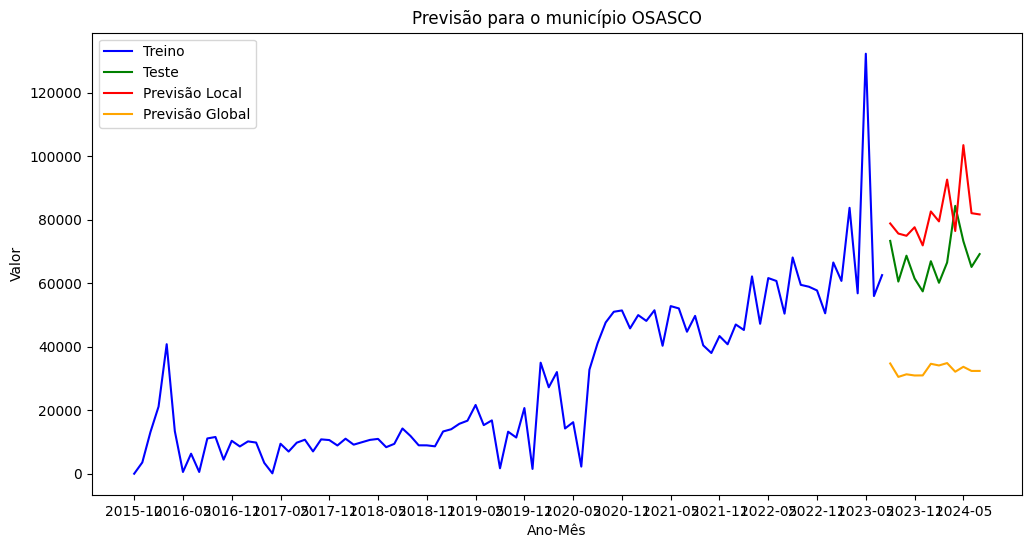

In [17]:
import random
import matplotlib.pyplot as plt

# Escolher um município aleatoriamente
municipio_escolhido = random.choice(municipios_selecionados)

# Obter os dados reais
df_municipio = series_dict[municipio_escolhido]
if 'ano-mes' not in df_municipio.columns:
    df_municipio['ano-mes'] = df_municipio['year'].astype(str) + '-' + df_municipio['month'].astype(str).str.zfill(2)


# Dividir os dados em treino e teste
train = df_municipio['value'][:len(df_municipio)-12]
test = df_municipio['value'][len(df_municipio)-12:]

# Obter as previsões do modelo local
predictions_local = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit().forecast(steps=12)

# Obter as previsões do modelo global
predictions_global = SARIMAX(pd.concat(series_dict.values())['value'][:len(pd.concat(series_dict.values()))-12], order=(1,1,1), seasonal_order=(1,1,1,12)).fit().forecast(steps=12)

# Plotar os dados reais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(df_municipio['ano-mes'][:len(df_municipio)-12], train, label='Treino', color='blue')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], test, label='Teste', color='green')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], predictions_local, label='Previsão Local', color='red')
plt.plot(df_municipio['ano-mes'][len(df_municipio)-12:], predictions_global, label='Previsão Global', color='orange')
plt.title(f'Previsão para o município {municipio_escolhido}')
plt.xticks(df_municipio['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()